### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Import data

In [2]:
df = pd.read_csv("full.csv")
df_with_genre = pd.read_csv("full_with_genre.csv")
# df = df[df["view"] > 1e6]
# len(df)
print(df.columns)
df.head(2)

Index(['track', 'track_id', 'artist', 'album', 'sp_release_date', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'playcount', 'video_id', 'view', 'channelTitle',
       'yt_release_date', 'title'],
      dtype='object')


,track,track_id,artist,album,sp_release_date,duration,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,playcount,video_id,view,channelTitle,yt_release_date,title
0,Shape of You,0FE9t6xYkqWXU2ahLh6D8X,Ed Sheeran,Shape of You,2017-01-06,234,False,0.825,0.652,C♯,...,0.0931,0.931,95.977,4/4,2971854102,JGwWNGJdvx8,5533840092,Ed Sheeran,2017-01-30T10:57:50Z,Ed Sheeran - Shape of You (Official Music Video)
1,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,The Weeknd,Blinding Lights,2019-11-29,202,False,0.513,0.796,C♯,...,0.0938,0.345,171.017,4/4,2636804603,fHI8X4OXluQ,611764719,TheWeekndVEVO,2019-11-29T05:00:08Z,The Weeknd - Blinding Lights (Official Audio)


### Splitting data

In [ ]:
len(df[df["playcount"] < 500000000])

3591

In [ ]:
len(df[df["view"] < 500000000])

3832

In [ ]:
best = df[df['playcount'] > 500000000]
best = best[best['view'] > 500000000]

In [ ]:
worst = pd.concat([best, df]).drop_duplicates(keep=False)

In [ ]:
df["sp_release_date"].head()

0    2017-01-06
1    2019-11-29
2    2019-08-29
3    2017-09-15
4    2016-05-06
Name: sp_release_date, dtype: object

In [ ]:
df["sp_release_date"] =  pd.to_datetime(df['sp_release_date'], format='%Y-%m-%d')

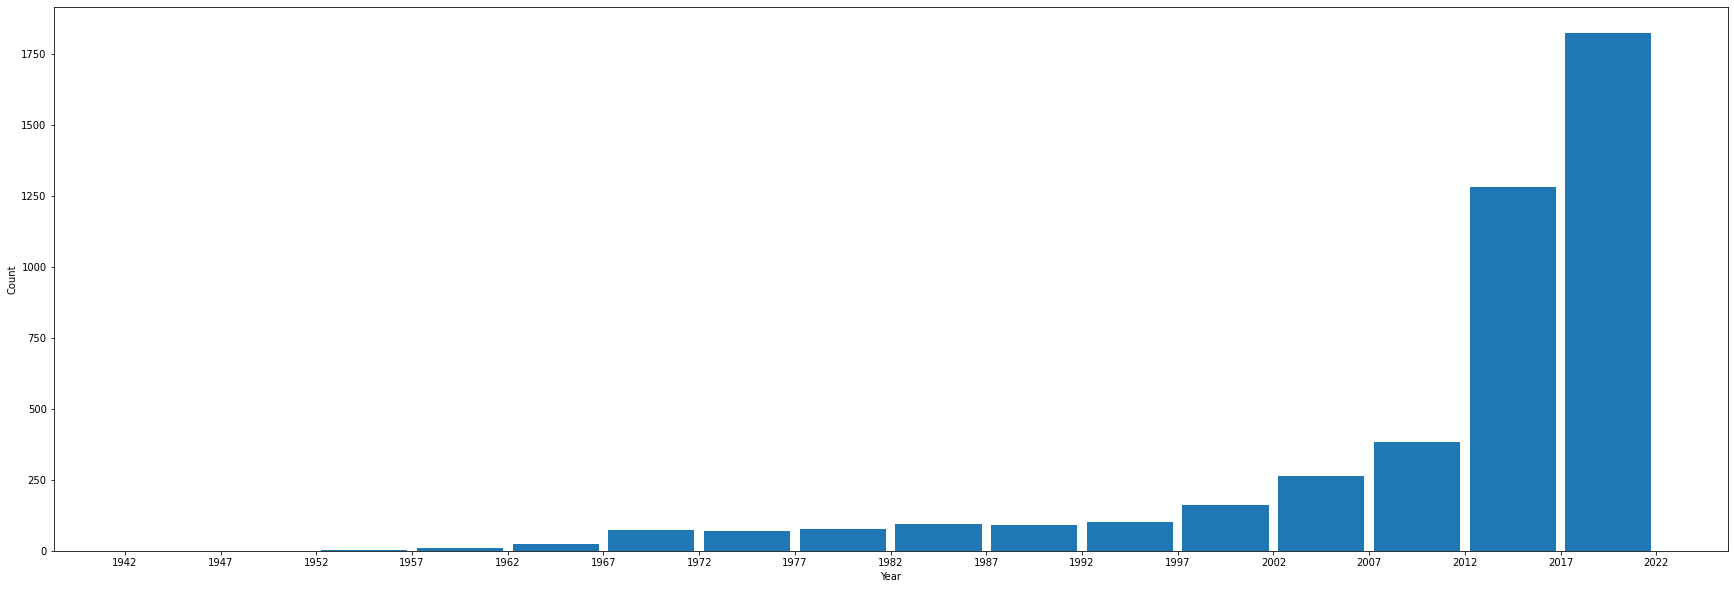

In [ ]:
import numpy as np
plt.figure(figsize=(30, 10))
data = df["sp_release_date"]
data = [t.year for t in data]
number = np.arange(min(data), max(data) + 5, 5)
label = map(lambda x: str(x), number)
plt.hist(data, bins=number, rwidth=0.9)
plt.xticks(number, label)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
first_chunk = df[df["sp_release_date"].apply(lambda x : x.year < 1980)]

In [ ]:
second_chunk = df[df["sp_release_date"].apply(lambda x : 1980 <= x.year < 1990)]

In [ ]:
third_chunk = df[df["sp_release_date"].apply(lambda x : 1990 <= x.year < 2000)]
len(third_chunk)

222

In [ ]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2000 <= x.year < 2010)]
len(forth_chunk)

521

In [ ]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2010 <= x.year < 2015)]
len(forth_chunk)

780

In [ ]:
fifth_chunk = df[df["sp_release_date"].apply(lambda x : 2015 <= x.year)]
len(fifth_chunk)

2535

### Correlation between each numeric variable and playcount, view

<AxesSubplot:ylabel='type'>

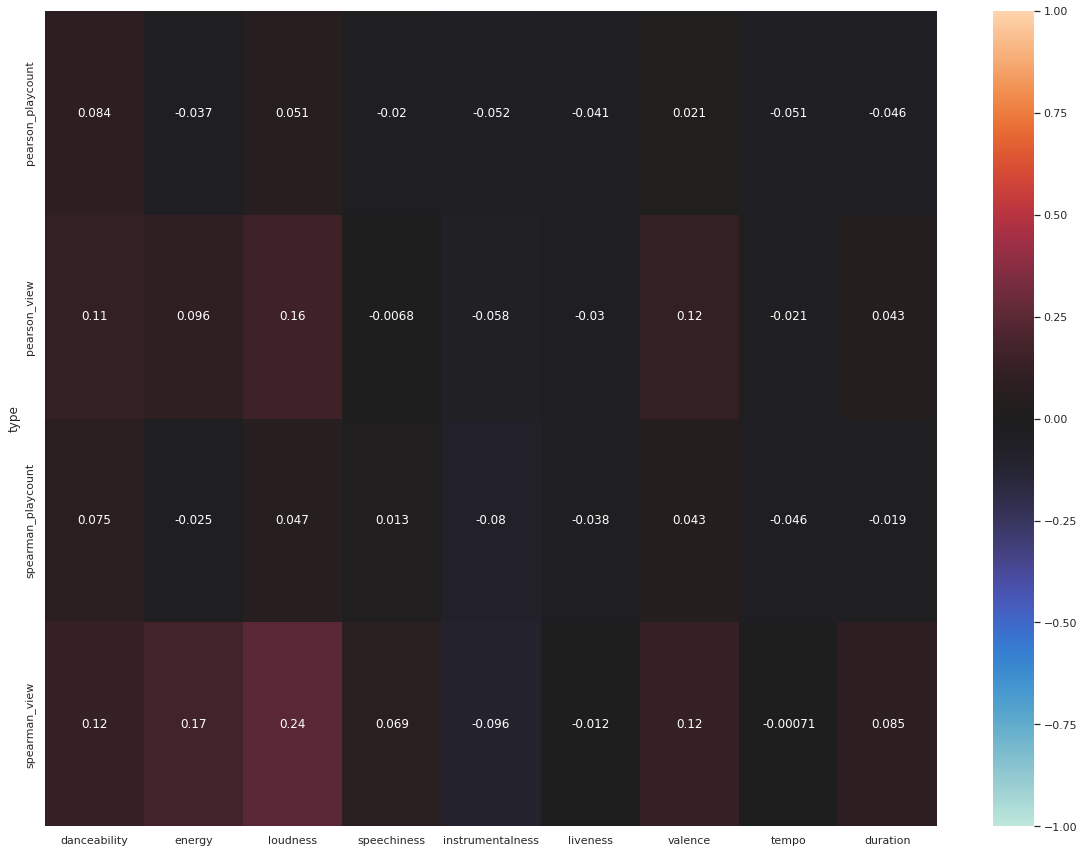

In [4]:
pearson_view = {}
pearson_playcount = {}
spearman_view = {}
spearman_playcount = {}
feature = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

for col in feature:
	pearson_playcount[col] = df['playcount'].corr(df[col], method='pearson')
	pearson_view[col] = df['view'].corr(df[col], method='pearson')
	spearman_view[col] = df['view'].corr(df[col], method='spearman')
	spearman_playcount[col] = df['playcount'].corr(df[col], method='spearman')

corr = pd.DataFrame(columns=feature)
corr = corr.append(pearson_playcount, ignore_index=True)
corr = corr.append(pearson_view, ignore_index=True)
corr = corr.append(spearman_playcount, ignore_index=True)
corr = corr.append(spearman_view, ignore_index=True)
corr['type'] = ['pearson_playcount', 'pearson_view', 'spearman_playcount', 'spearman_view']
corr = corr.set_index("type")

plt.figure(figsize=(20,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, center=0)

### Plot distributrion and basic statistics

In [5]:
stat_dict = {}
for f in feature:
    stat_dict[f] = {}

for f in feature:
    mean = df[f].mean(axis = 0)
    stat_dict[f]['mean'] = mean
    #print(mean)
    variance = df[f].var(axis = 0)
    stat_dict[f]['variance'] = variance
    #print(variance)
    skewness = df[f].skew(axis = 0)
    stat_dict[f]['skewness'] = skewness
    #print(skewness)
    kurtosis = df[f].kurt(axis = 0)
    stat_dict[f]['kurtosis'] = kurtosis
    

    #print(kurtosis)

In [6]:
stat_dict

{'danceability': {'mean': 0.6443535403318548,
  'variance': 0.02215983851153563,
  'skewness': -0.4110159114617081,
  'kurtosis': -0.18407866822103447},
 'energy': {'mean': 0.6650530474782322,
  'variance': 0.03227642008231503,
  'skewness': -0.5862263806926307,
  'kurtosis': -0.03751986482823577},
 'loudness': {'mean': -6.427306554953179,
  'variance': 7.433456595459819,
  'skewness': -1.5076584826708914,
  'kurtosis': 4.611032383053047},
 'speechiness': {'mean': 0.09709218005585674,
  'variance': 0.008781066409426662,
  'skewness': 2.220342252407238,
  'kurtosis': 5.826045993228468},
 'instrumentalness': {'mean': 0.020313293719402003,
  'variance': 0.010444922162122722,
  'skewness': 6.514409951461633,
  'kurtosis': 45.04087632835456},
 'liveness': {'mean': 0.17851002135699032,
  'variance': 0.019593387694495108,
  'skewness': 2.131406064472224,
  'kurtosis': 5.368159102957294},
 'valence': {'mean': 0.5098133727616231,
  'variance': 0.053129976751800395,
  'skewness': 0.0687341769632

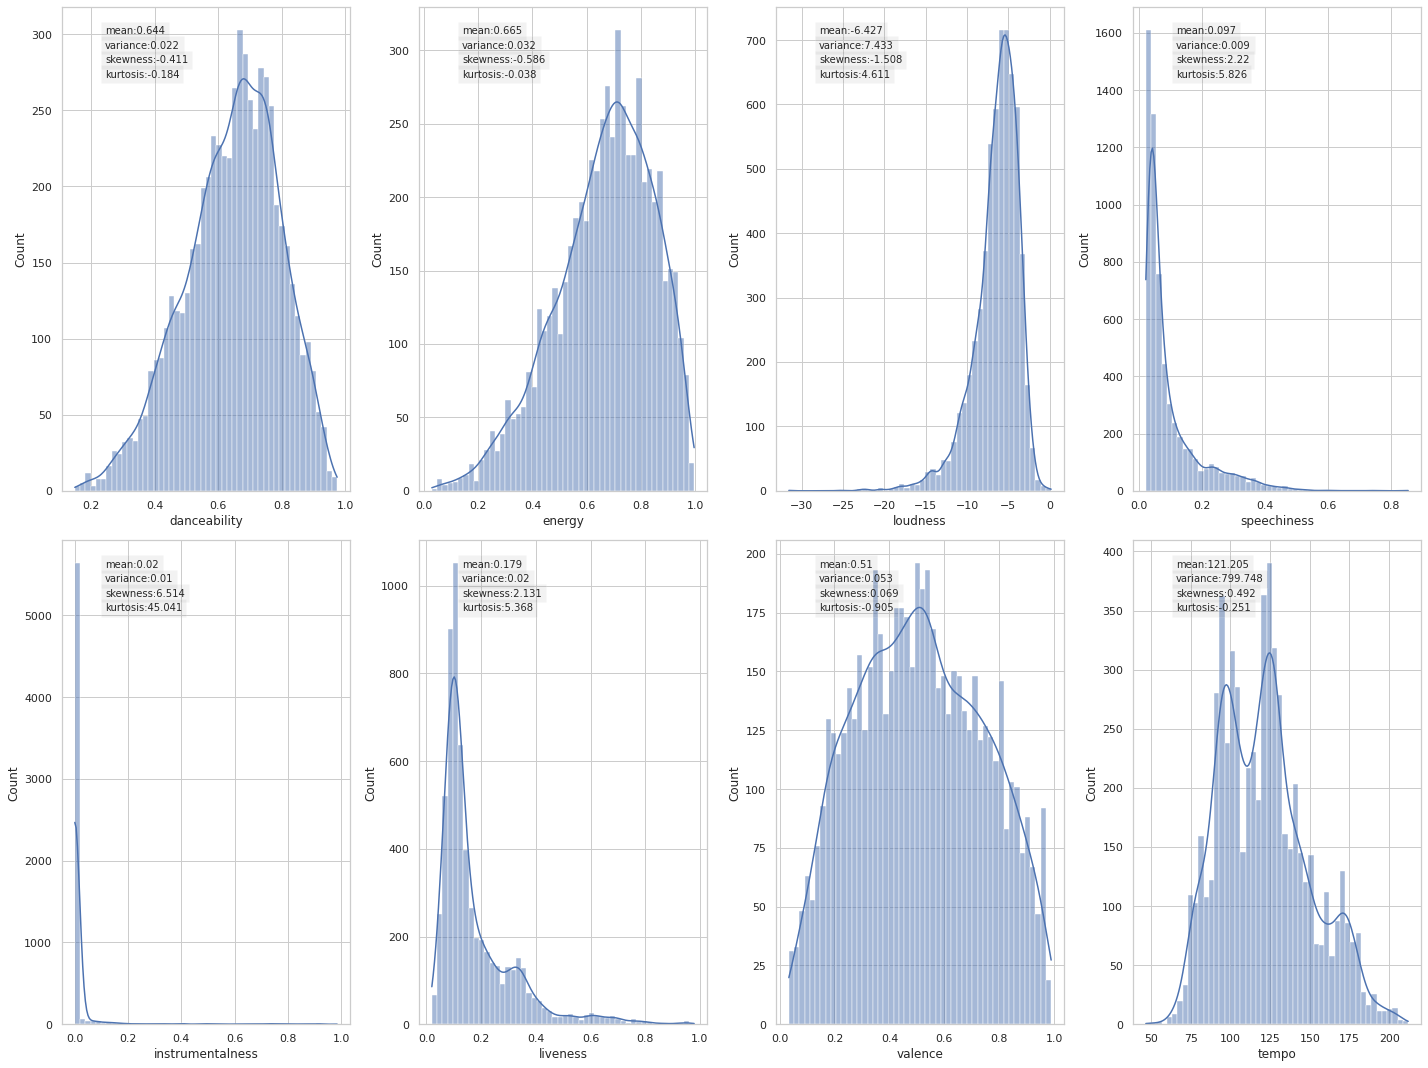

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for i in range(len(feature)):
    if feature[i] == "duration":
        continue
    if i < 4:
        row = 0
    else:
        row = 1
    col = i % 4
    for j, key in enumerate(stat_dict[feature[i]].keys()):
        ax[row, col].text(0.15, 0.95 - j * 0.03, '{}:{}'.format(key, round(stat_dict[feature[i]][key], 3)), size=10,
                          verticalalignment='center', transform=ax[row, col].transAxes, bbox=dict(facecolor='grey', alpha=0.1))
    sns.histplot(data=df, x=feature[i], ax=ax[row, col], kde=True, bins=50)
fig.tight_layout()


#### Duration distribution

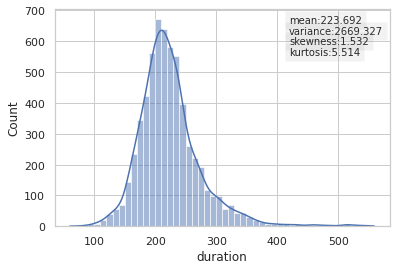

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="duration", kde=True, bins=50, ax=ax)
for j, key in enumerate(stat_dict["duration"].keys()):
    ax.text(0.7, 0.95 - j * 0.05, '{}:{}'.format(key, round(stat_dict["duration"][key], 3)), size=10, verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='grey', alpha=0.1))

### Correlation between playcount and view

In [9]:
df['playcount'].corr(df['view'], method='spearman')

0.5756345163642145

<AxesSubplot:xlabel='playcount', ylabel='view'>

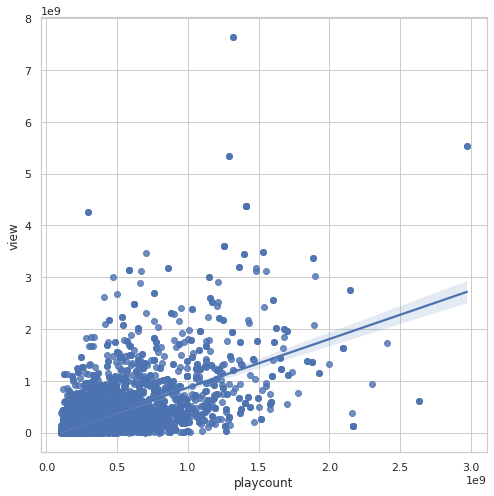

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
sns.regplot(data=df, x="playcount", y="view", ax=ax)

### Counts of each mode with different playcount bins

#### Shitty population pyramid

In [11]:
bins = pd.IntervalIndex.from_tuples([(0, 2e8), (2e8, 3e8), (3e8, 4e8), (4e8, 5e8), (5e8, 7.5e8), (7.5e8, 1e9), (1e9, 3e9)])
df["bins"] = pd.cut(df["playcount"], bins)

In [12]:
pop_dist_0 = df[df["mode"] == "minor"].groupby("bins")[["playcount"]].count()
pop_dist_1 = df[df["mode"] == "major"].groupby("bins")[["playcount"]].count()
pop_dist = pd.DataFrame()
pop_dist["major"] = pop_dist_0['playcount']
pop_dist["minor"] = pop_dist_1['playcount'].apply(lambda x: 0 - x)
pop_dist = pop_dist.reset_index()

In [13]:
pop_dist

,bins,major,minor
0,"(0.0, 200000000.0]",860,-1228
1,"(200000000.0, 300000000.0]",523,-900
2,"(300000000.0, 400000000.0]",314,-466
3,"(400000000.0, 500000000.0]",210,-310
4,"(500000000.0, 750000000.0]",252,-398
5,"(750000000.0, 1000000000.0]",131,-188
6,"(1000000000.0, 3000000000.0]",127,-180


Text(0.5, 0, 'bruh')

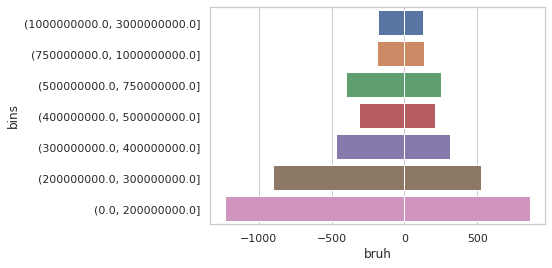

In [14]:
sns.barplot(x="major", y="bins", data=pop_dist, order=bins[::-1])
sns.barplot(x="minor", y="bins", data=pop_dist, order=bins[::-1])
plt.xlabel("bruh")

#### Epic lollipop plot

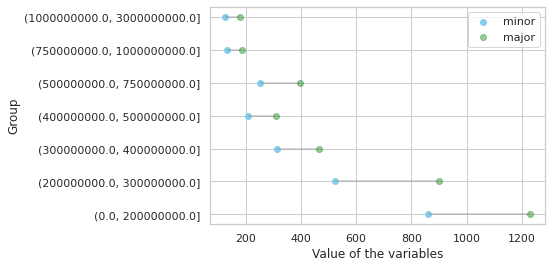

In [15]:
pop_dist_0 = df[df["mode"] =="minor"].groupby("bins")[["playcount"]].count()
pop_dist_1 = df[df["mode"] == "major"].groupby("bins")[["playcount"]].count()
pop_dist = pd.DataFrame()
pop_dist["minor"] = pop_dist_0['playcount']
pop_dist["major"] = pop_dist_1['playcount']
pop_dist = pop_dist.reset_index()
my_range=range(1,len(pop_dist.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=pop_dist['minor'], xmax=pop_dist['major'], color='grey', alpha=0.4)
plt.scatter(pop_dist['minor'], my_range, color='skyblue', alpha=1, label='minor')
plt.scatter(pop_dist['major'], my_range, color='green', alpha=0.4 , label='major')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, pop_dist['bins'])
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

### Scatter plot of view and playcount corresponding to the "explicit" variable

explicit
False    4376
True     1711
Name: track_id, dtype: int64


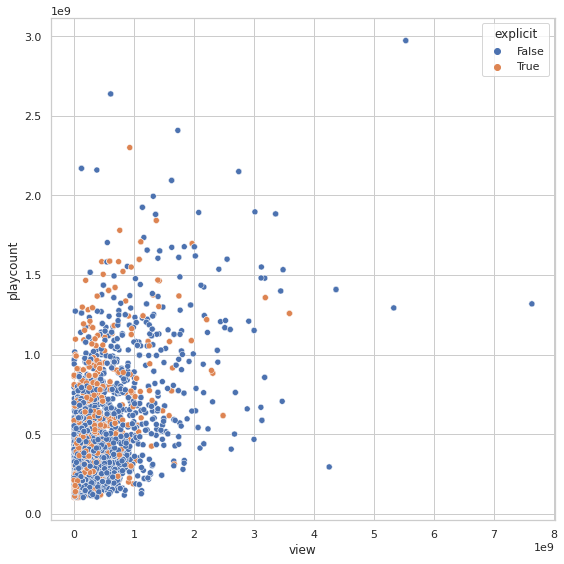

In [16]:
print(df.groupby('explicit')['track_id'].count())
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='explicit', ax=ax)
f.tight_layout()

### Strip plot of the playcount of each key

<AxesSubplot:xlabel='key', ylabel='playcount'>

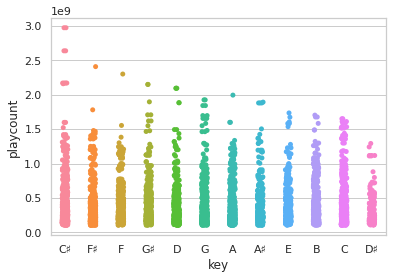

In [17]:
sns.stripplot(x="key", y="playcount", data=df)

[Text(0.5, 0, 'Key'), Text(0, 0.5, 'Youtube Views')]

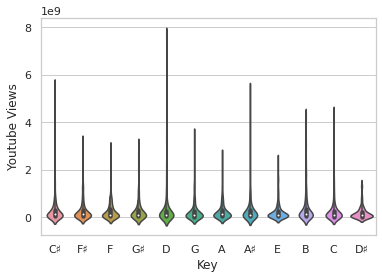

In [18]:
ax = sns.violinplot(x="key", y="view", data=df)
ax.set(xlabel='Key', ylabel='Youtube Views')

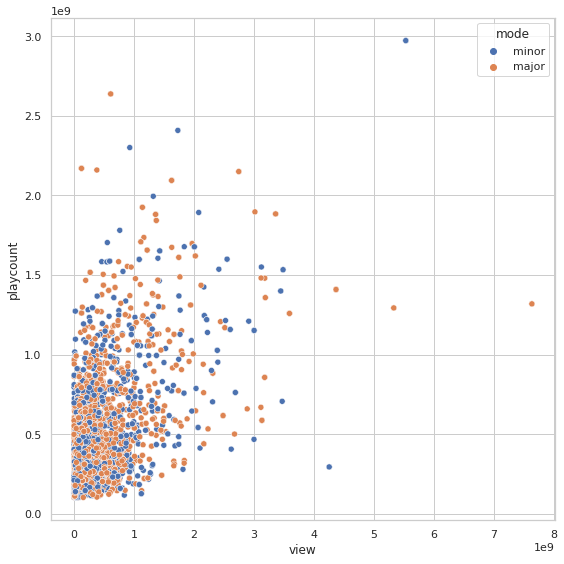

In [19]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='mode', ax=ax)
f.tight_layout()

### Bar plot of the counts of each categorical variable

#### Explicit

<AxesSubplot:xlabel='explicit', ylabel='count'>

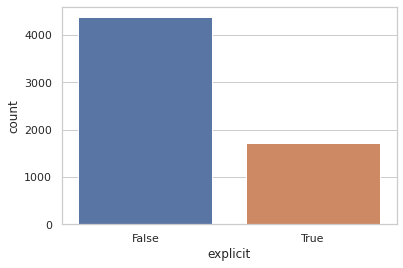

In [20]:
sns.countplot(x="explicit", data=df, order=df['explicit'].value_counts().index)

#### Key

<AxesSubplot:xlabel='key', ylabel='count'>

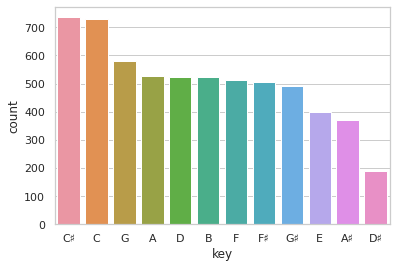

In [21]:
sns.countplot(x="key", data=df, order=df['key'].value_counts().index)

#### Time signature

<AxesSubplot:xlabel='time_signature', ylabel='count'>

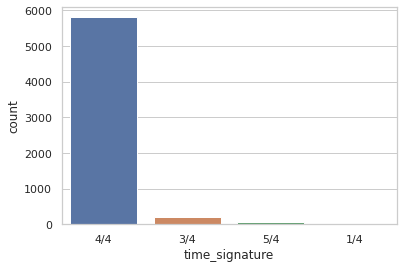

In [22]:
sns.countplot(x="time_signature", data=df, order=df['time_signature'].value_counts().index)

#### Mode

<AxesSubplot:xlabel='mode', ylabel='count'>

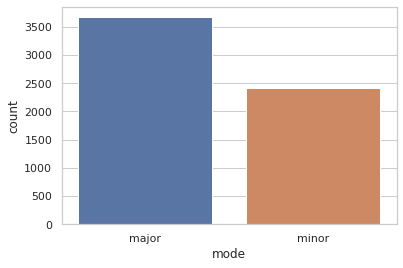

In [23]:
sns.countplot(x="mode", data=df, order=df['mode'].value_counts().index)

### Artists with most popular songs

<AxesSubplot:xlabel='count', ylabel='artist'>

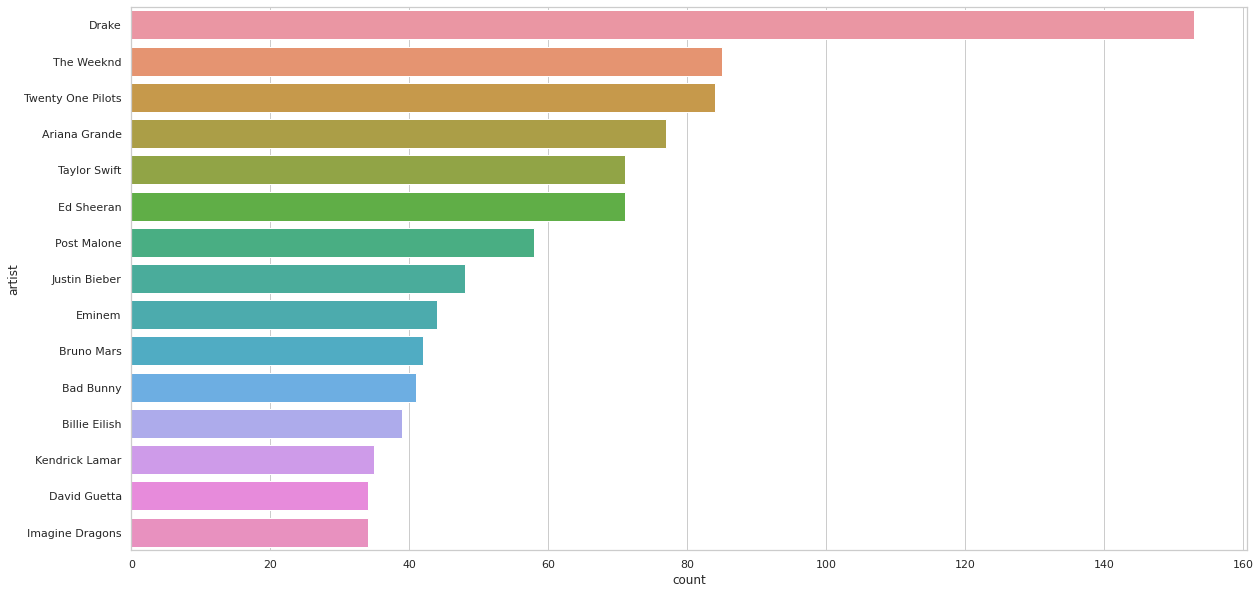

In [26]:
plt.figure(figsize=(20, 10))
df_no_various_artist = df[df["artist"] != "Various Artists"]
sns.countplot(y="artist", data=df_no_various_artist, order=df_no_various_artist['artist'].value_counts().index[0:15])

### Genre

#### The count of each genre

<AxesSubplot:xlabel='genres', ylabel='count'>

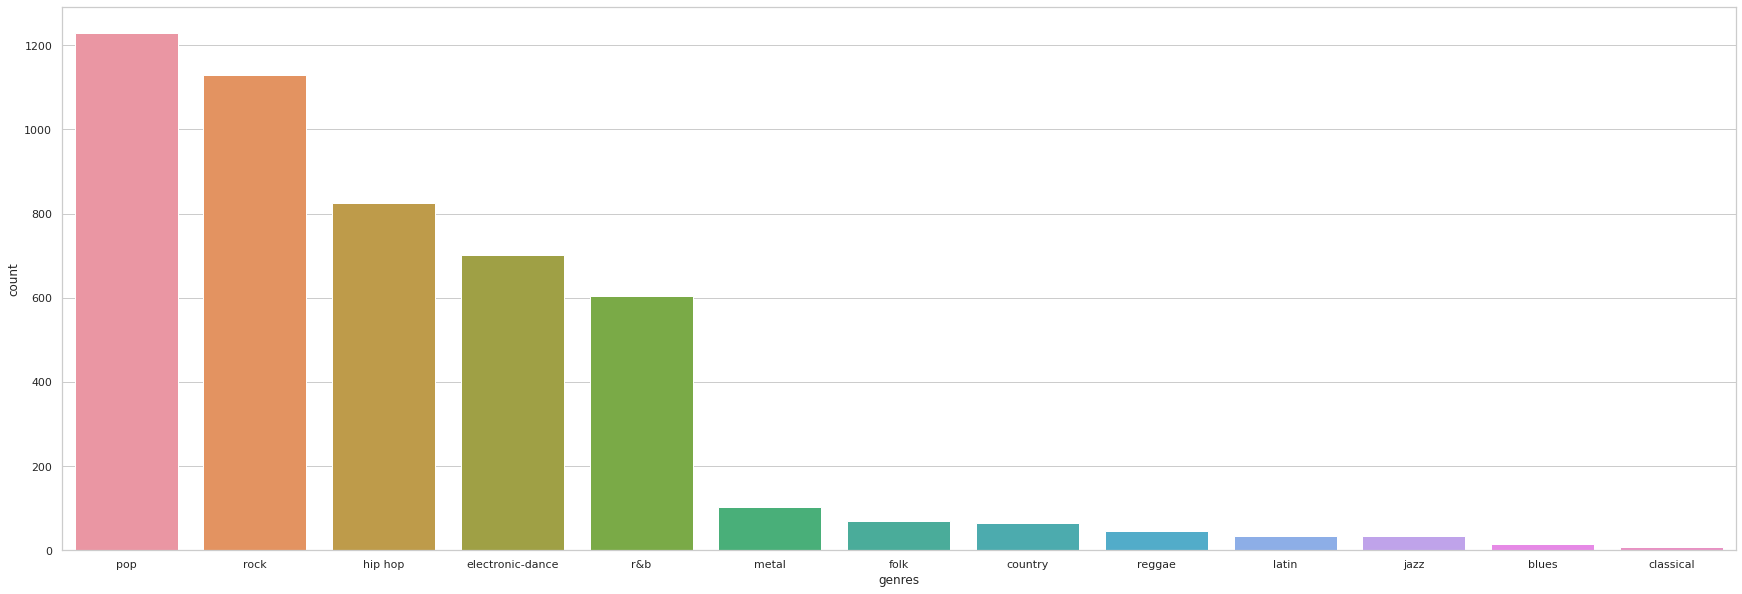

In [3]:
plt.figure(figsize=(30,10))
sns.countplot(x="genres", data=df_with_genre, order=df_with_genre['genres'].value_counts(dropna=True).index)

#### Playcount and view distribution with respect to each genre

<AxesSubplot:xlabel='genres', ylabel='view'>

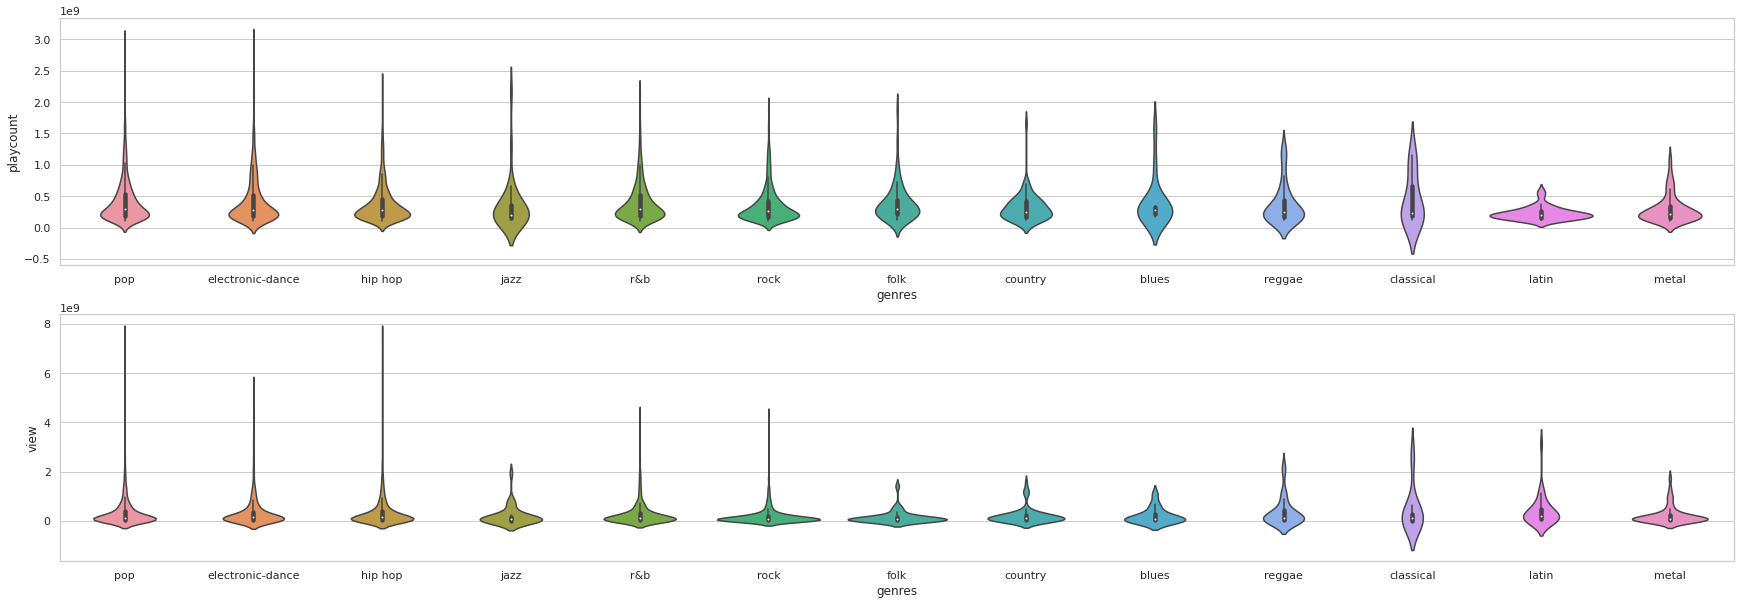

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(30, 10))
sns.violinplot(x="genres", y="playcount", data=df_with_genre, ax=ax[0])
sns.violinplot(x="genres", y="view", data=df_with_genre, ax=ax[1])

#### Mean views and playcounts of the explicit and non-explicit songs of each genre

<AxesSubplot:xlabel='genres', ylabel='view'>

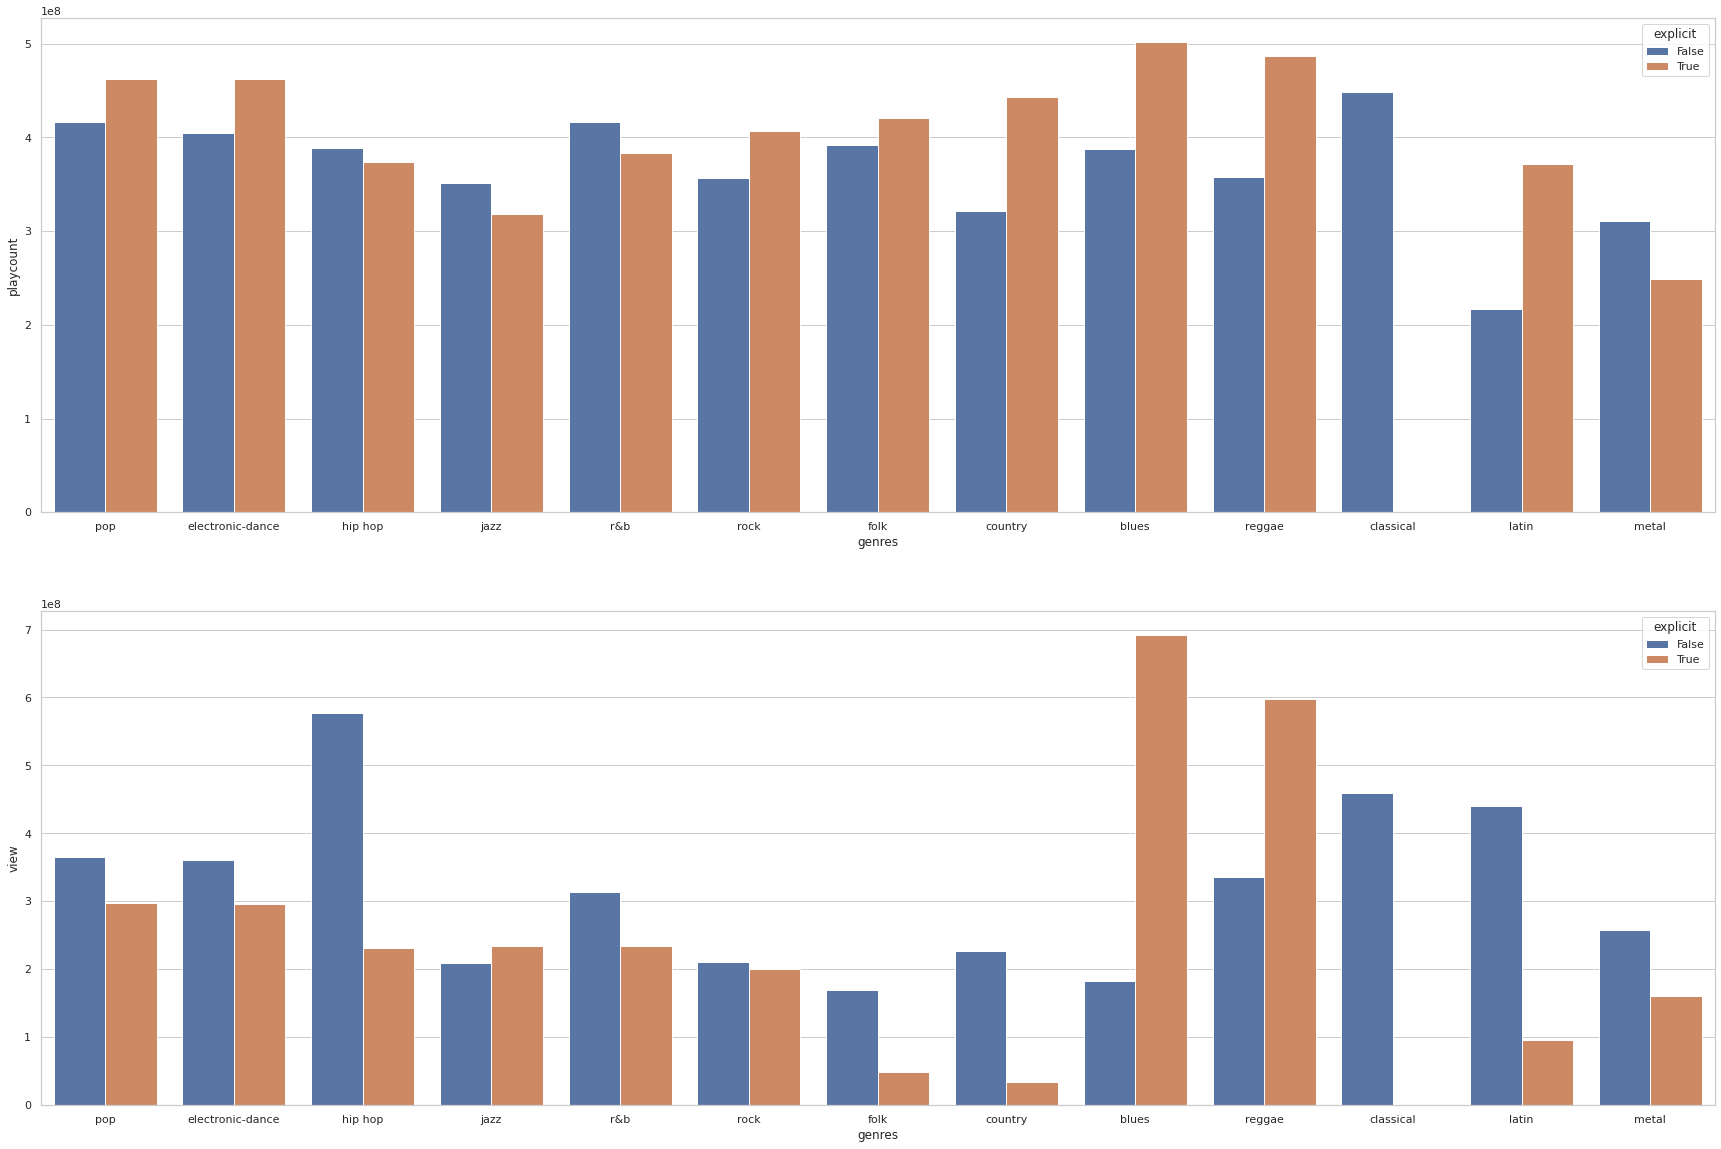

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(30, 20))
sns.barplot(x="genres", y="playcount", data=df_with_genre, ax=ax[0], ci=None, hue="explicit")
sns.barplot(x="genres", y="view", data=df_with_genre, ax=ax[1], ci=None, hue="explicit")

#### Same with mode